In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
np.random.seed(3)

In [3]:
def gaussmf(x, mean, sigma):

    return np.exp(-((x - mean)**2.) / (2 * sigma**2.))

In [4]:
df = pd.read_csv('transfusion.csv')

In [5]:
df.head(10)

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
5,4,4,1000,4,0
6,2,7,1750,14,1
7,1,12,3000,35,0
8,2,9,2250,22,1
9,5,46,11500,98,1


In [6]:
df_x = df.drop(['whether he/she donated blood in March 2007'], axis=1)

In [7]:
dict = {}
for k in df_x.keys():
    mean = df_x.mean()[k]
    sigma = df_x.std()[k]
    x = df_x[k]
    small = gaussmf(x, mean - sigma, sigma)
    medium = gaussmf(x, mean, sigma)
    large = gaussmf(x, mean + sigma, sigma)

    dict[k+'_s'] = small
    dict[k+'_m'] = medium
    dict[k+'_l'] = large

In [8]:
X = pd.DataFrame(dict)

In [9]:
X.head(10)

,Recency (months)_s,Recency (months)_m,Recency (months)_l,Frequency (times)_s,Frequency (times)_m,Frequency (times)_l,Monetary (c.c. blood)_s,Monetary (c.c. blood)_m,Monetary (c.c. blood)_l,Time (months)_s,Time (months)_m,Time (months)_l
0,0.997359,0.650560,0.156109,7.439777e-17,2.496149e-13,3.080965e-10,7.439777e-17,2.496149e-13,3.080965e-10,0.001459,0.032837,0.271903
1,0.984919,0.501813,0.094056,7.401486e-02,4.397236e-01,9.610505e-01,7.401486e-02,4.397236e-01,9.610505e-01,0.759194,0.967338,0.453430
2,0.998710,0.575742,0.122102,2.008460e-02,1.994560e-01,7.286793e-01,2.008460e-02,1.994560e-01,7.286793e-01,0.588673,0.999566,0.624388
3,0.997359,0.650560,0.156109,2.340309e-03,4.610567e-02,3.341496e-01,2.340309e-03,4.610567e-02,3.341496e-01,0.354752,0.907866,0.854721
4,0.998710,0.575742,0.122102,1.705665e-04,6.666105e-03,9.584204e-02,1.705665e-04,6.666105e-03,9.584204e-02,0.022644,0.215356,0.753476
5,0.950157,0.793460,0.243759,7.601454e-01,9.669159e-01,4.524663e-01,7.601454e-01,9.669159e-01,4.524663e-01,0.971083,0.462274,0.080956
6,0.997359,0.650560,0.156109,4.553399e-01,9.681678e-01,7.573055e-01,4.553399e-01,9.681678e-01,7.573055e-01,0.985992,0.707417,0.186717
7,0.998710,0.575742,0.122102,1.078112e-01,5.396975e-01,9.938995e-01,1.078112e-01,5.396975e-01,9.938995e-01,0.588673,0.999566,0.624388
8,0.997359,0.650560,0.156109,2.794328e-01,8.368373e-01,9.219560e-01,2.794328e-01,8.368373e-01,9.219560e-01,0.884189,0.880795,0.322783
9,0.906414,0.856453,0.297705,2.155613e-14,3.645726e-11,2.268313e-08,2.155613e-14,3.645726e-11,2.268313e-08,0.001459,0.032837,0.271903


In [10]:
y = pd.get_dummies(df['whether he/she donated blood in March 2007'])

In [11]:
y.head(10)

,0,1
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0
5,1,0
6,0,1
7,1,0
8,0,1
9,0,1


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [13]:
#T function
def T(x,L1,L2,cn):
    r = x - np.dot(L1,x) + L2
    s = np.abs(r)-cn
    s = np.maximum(s,0,s)
    return s*np.sign(r)

def thetan(x0,x1,n):
    if (x0==x1).all():
        return 0
    else:
        return 1/(2**n*np.linalg.norm(x1-x0,'fro'))

In [14]:
H = X_train
itrs = 500
L = 1. / np.max(np.linalg.eigvals(np.dot(H.T, H))).real
m = H.shape[1]
n = y_train.shape[1]
x0 = np.zeros((m,n))
x1 = np.zeros((m,n))
L1 = 2*L*np.dot(H.T, H)
L2 = 2*L*np.dot(H.T, y_train)
lam=1e-1
acc_rate_validation = []
acc_rate_train = []
for i in range(1,itrs+1):
    cn = ((2e-6*i)/(2*i+1))*lam*L
    beta = 0.9*i/(i+1)
    alpha = 0.9*i/(i+1)

    y = x1 + thetan(x0,x1,i)*(x1-x0)
    z = (1-beta)*x1 + beta*T(x1,L1,L2,cn)

    Ty = T(y,L1,L2,cn)
    Tz = T(z,L1,L2,cn)
    x = (1-alpha)*Ty + alpha*Tz

    x0, x1 = x1, x
    
    W = x

    predict_val = X_test.dot(W).values

    actual_val  = y_test.values

    acc_rate_validation.append([i, np.sum(np.argmax(predict_val, axis=1) == np.argmax(actual_val, axis=1)) / y_test.shape[0]])
    
    predict_train = X_train.dot(W).values

    actual_train  = y_train.values

    acc_rate_train.append([i, np.sum(np.argmax(predict_train, axis=1) == np.argmax(actual_train, axis=1)) / y_train.shape[0]])

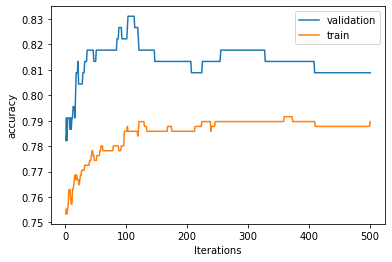

In [15]:
plt.xlabel('Iterations')
plt.ylabel('accuracy')
plt.plot(range(1,501), [x[1] for x in acc_rate_validation], label='validation')
plt.plot(range(1,501), [x[1] for x in acc_rate_train], label='train')
plt.legend()